# Preprocessing the raw BBC Text Document Data

In [1]:
import os

bbc_dir='D:\\TensorFlow Programs\\Text Classification Programs and Datasets\\bbc'

labels = []
texts = []

for label_type in ['business','entertainment','politics','sport','tech']:
    dir_name=os.path.join(bbc_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:]=='.txt':
            f=open(os.path.join(dir_name,fname))
            texts.append(f.read())
            f.close()
            if label_type=='business':
                labels.append(0)
            elif label_type=='entertainment':
                labels.append(1)
            elif label_type=='politics':
                labels.append(2)
            elif label_type=='sport':
                labels.append(3)
            elif label_type=='tech':
                labels.append(4)

# Tokenizing the data

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np

maxlen=400
training_samples=1900
validation_samples=len(texts)-training_samples
max_words=30000

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences=tokenizer.texts_to_sequences(texts)
word_index=tokenizer.word_index
print('Found %s unique tokens'%len(word_index))

data=pad_sequences(sequences, maxlen=maxlen)

labels=np.asarray(labels)
labels=to_categorical(labels,num_classes=5)
print(labels.shape)
print('Shape of data tensor:',data.shape)
print('Shape of label tensor:',labels.shape)

indices=np.arange(data.shape[0])
np.random.shuffle(indices)
data=data[indices]
labels=labels[indices]
      
x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples:training_samples+validation_samples]
y_val=labels[training_samples:training_samples+validation_samples]

Using TensorFlow backend.


Found 32360 unique tokens
(2225, 5)
Shape of data tensor: (2225, 400)
Shape of label tensor: (2225, 5)


# Defining a model

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras import optimizers
from keras.callbacks import ModelCheckpoint

embedding_dim=100
model=Sequential()
model.add(Embedding(max_words,embedding_dim))
model.add(LSTM(512,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
model.summary()
filepath="BBC_Text_Document_Classification_using_Recurrent_Neural_Network_12th Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         3000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 512)               1255424   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 4,257,989
Trainable params: 4,257,989
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [4]:
history=model.fit(x_train,y_train, epochs=50, callbacks=callbacks_list, batch_size=32, validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1900 samples, validate on 325 samples
Epoch 1/50
1900/1900 [==============================] - 39s 20ms/step - loss: 1.6065 - categorical_accuracy: 0.2505 - val_loss: 1.6008 - val_categorical_accuracy: 0.3169
Epoch 2/50
1900/1900 [==============================] - 37s 19ms/step - loss: 1.5969 - categorical_accuracy: 0.2789 - val_loss: 1.5788 - val_categorical_accuracy: 0.3508
Epoch 3/50
1900/1900 [==============================] - 37s 19ms/step - loss: 1.5206 - categorical_accuracy: 0.4105 - val_loss: 1.4567 - val_categorical_accuracy: 0.4492
Epoch 4/50
1900/1900 [==============================] - 36s 19ms/step - loss: 1.3699 - categorical_accuracy: 0.4463 - val_loss: 1.1785 - val_categorical_accuracy: 0.4615
Epoch 5/50
1900/1900 [==============================] - 37s 19ms/step - loss: 1.2262 - categorical_accuracy: 0.4516 - val_loss: 1.1300 - val_categorical_accuracy: 0.4738
Epoch 6/50
1900/1900 [==============================] -

1900/1900 [==============================] - 38s 20ms/step - loss: 0.0287 - categorical_accuracy: 0.9958 - val_loss: 0.7246 - val_categorical_accuracy: 0.7600
Epoch 48/50
1900/1900 [==============================] - 37s 20ms/step - loss: 0.0343 - categorical_accuracy: 0.9942 - val_loss: 0.7033 - val_categorical_accuracy: 0.8062
Epoch 49/50
1900/1900 [==============================] - 37s 19ms/step - loss: 0.0152 - categorical_accuracy: 0.9989 - val_loss: 0.7171 - val_categorical_accuracy: 0.7969
Epoch 50/50
1900/1900 [==============================] - 37s 20ms/step - loss: 0.0107 - categorical_accuracy: 0.9979 - val_loss: 0.7338 - val_categorical_accuracy: 0.7846


# Plotting the results

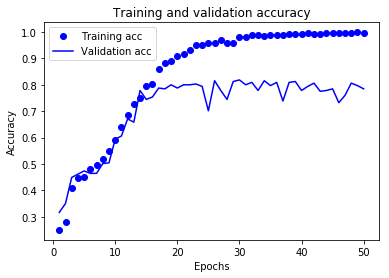

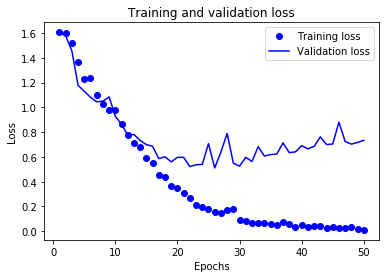

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
from tensorflow.python.keras.models import load_model

best_model = load_model('BBC_Text_Document_Classification_using_Recurrent_Neural_Network_12th Experiment.h5')

In [7]:
from tensorflow.python.keras.models import load_model

batch_size=32
steps_test=int(len(x_val)/batch_size)
result = best_model.evaluate(x_val, y_val, steps=steps_test,verbose=1)
print("Validation-set accuracy: {0:.2%}".format(result[1]))

10/10 [==============================] - 6s 573ms/step - loss: 0.5109 - categorical_accuracy: 0.8154
Validation-set accuracy: 81.54%


In [8]:
# Get predictions
preds = best_model.predict(x_val, batch_size=16,verbose=1)
preds=np.around(preds)

orig_val_labels=np.argmax(y_val,axis=1)
predicted_labels=np.argmax(preds,axis=1)

orig_val_labels=np.reshape(orig_val_labels,(325,1))
predicted_labels=np.reshape(predicted_labels,(325,1))

print(predicted_labels.shape)
print(orig_val_labels.shape)

325/325 [==============================] - 4s 14ms/sample
(325, 1)
(325, 1)


<Figure size 432x288 with 0 Axes>

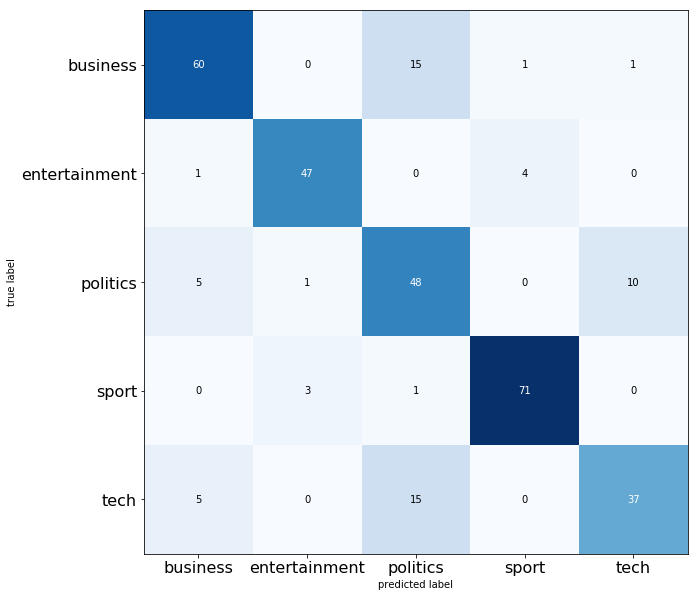

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_val_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(15,10), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['business', 'entertainment','politics','sport','tech'], fontsize=16)
plt.yticks(range(5), ['business', 'entertainment','politics','sport','tech'], fontsize=16)
plt.show()